# Obesity Levels Research Project
## AAI 500 - Fall 2024

### Researchers

    Bosky Atani
    Dean P. Simmer

In [430]:
import pandas as pd

# load the data file
obesity_file_path = "data/ObesityDataSet_raw_and_data_sinthetic.csv"
obesity = pd.read_csv(obesity_file_path , sep=",")
obesity.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [431]:
obesity = obesity.rename(columns={"CALC":"alcohol_drinking_frequency",
            "FAVC":"high_calorie_food_eat",
            "FCVC":"vegetable_eat_daily",
            "NCP":"number_of_meals_daily",
            "SCC":"calories_monitoring",
            "CH2O":"water_drinking_daily",
            "FAF":"physical_activity_daily",
            "TUE":"electronics_usage_daily",
            "CAEC":"food_between_meals",
            "MTRANS":"method_of_transport"})

In [432]:
# add BMI to dataset
obesity['BMI'] = obesity['Weight'] / (obesity['Height'] ** 2)

In [433]:

obesity.describe().round(2)

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,water_drinking_daily,physical_activity_daily,electronics_usage_daily,BMI
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66,29.70
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61,8.01
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00,13.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00,24.33
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63,28.72
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00,36.02
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00,50.81


Sample size is 2111

Age Distribution is right skewed

Mean age is 24.21 and median at 22.78.

The population dataset is mostly younger individuals

Mean weight is 86.59kg, std of 27.19.

In [434]:
# Check for any null values in the DataFrame
print(obesity.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
high_calorie_food_eat             0
vegetable_eat_daily               0
number_of_meals_daily             0
food_between_meals                0
SMOKE                             0
water_drinking_daily              0
calories_monitoring               0
physical_activity_daily           0
electronics_usage_daily           0
alcohol_drinking_frequency        0
method_of_transport               0
NObeyesdad                        0
BMI                               0
dtype: int64


In [435]:
# Check for duplicate rows
duplicates = obesity.duplicated()

# Show how many duplicate rows are there
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows (if any)
duplicate_rows = obesity[duplicates]
print(duplicate_rows)

Number of duplicate rows: 24
     Gender   Age  Height  Weight family_history_with_overweight high_calorie_food_eat  vegetable_eat_daily  number_of_meals_daily food_between_meals SMOKE  water_drinking_daily calories_monitoring  physical_activity_daily  electronics_usage_daily alcohol_drinking_frequency    method_of_transport           NObeyesdad        BMI
98   Female  21.0    1.52    42.0                             no                    no                  3.0                    1.0         Frequently    no                   1.0                  no                      0.0                      0.0                  Sometimes  Public_Transportation  Insufficient_Weight  18.178670
106  Female  25.0    1.57    55.0                             no                   yes                  2.0                    1.0          Sometimes    no                   2.0                  no                      2.0                      0.0                  Sometimes  Public_Transportation        Normal

In [436]:
# not many duplicates, drop them
# Alternatively, drop duplicates in place
obesity.drop_duplicates(inplace=True)

In [437]:
# validate the summary statistics are still similar
print(obesity.describe())

               Age       Height       Weight  vegetable_eat_daily  number_of_meals_daily  water_drinking_daily  physical_activity_daily  electronics_usage_daily          BMI
count  2087.000000  2087.000000  2087.000000          2087.000000            2087.000000           2087.000000              2087.000000              2087.000000  2087.000000
mean     24.353090     1.702674    86.858730             2.421466               2.701179              2.004749                 1.012812                 0.663035    29.765758
std       6.368801     0.093186    26.190847             0.534737               0.764614              0.608284                 0.853475                 0.608153     8.024934
min      14.000000     1.450000    39.000000             1.000000               1.000000              1.000000                 0.000000                 0.000000    12.998685
25%      19.915937     1.630178    66.000000             2.000000               2.697467              1.590922                 0.1

In [438]:
# Create a dictionary with obesity categories and corresponding ranges to understand how NObesity is computed
obesity_data = {
    'Category': ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
    'BMI Range': ['Less than 18.5', '18.5 to 24.9', '25.0 to 29.9', '30.0 to 34.9', '35.0 to 39.9', 'Higher than 40']
}

# Convert dictionary to DataFrame
obesity_table = pd.DataFrame(obesity_data)

# Display the table
print(obesity_table)

      Category       BMI Range
0  Underweight  Less than 18.5
1       Normal    18.5 to 24.9
2   Overweight    25.0 to 29.9
3    Obesity I    30.0 to 34.9
4   Obesity II    35.0 to 39.9
5  Obesity III  Higher than 40


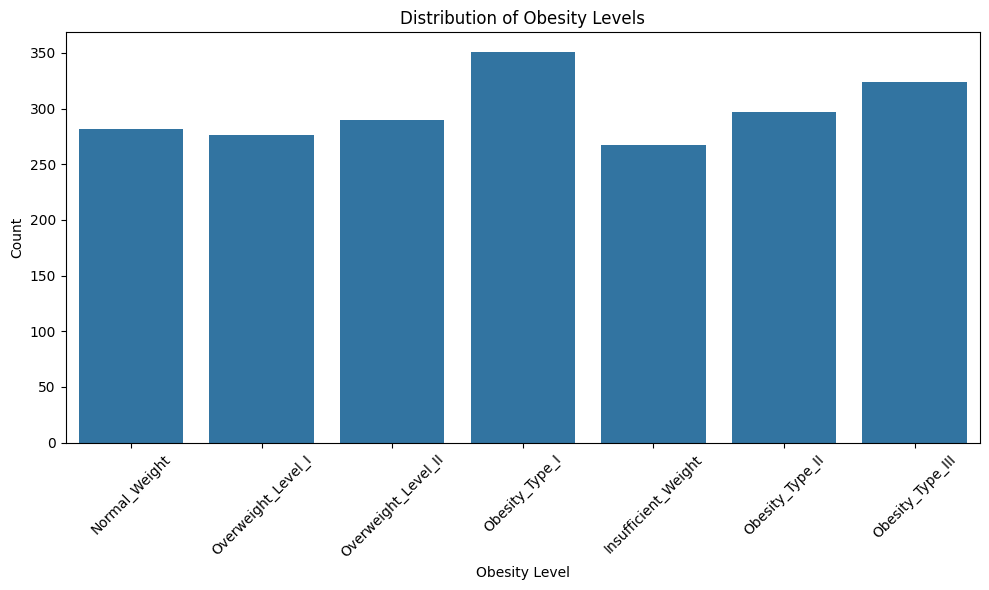

In [439]:
# Plot the distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=obesity)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Balanced distribution of obesity level. (Important to validate: Since there is signifcant part of the dataset that is synthetic)

### Univariate Analysis

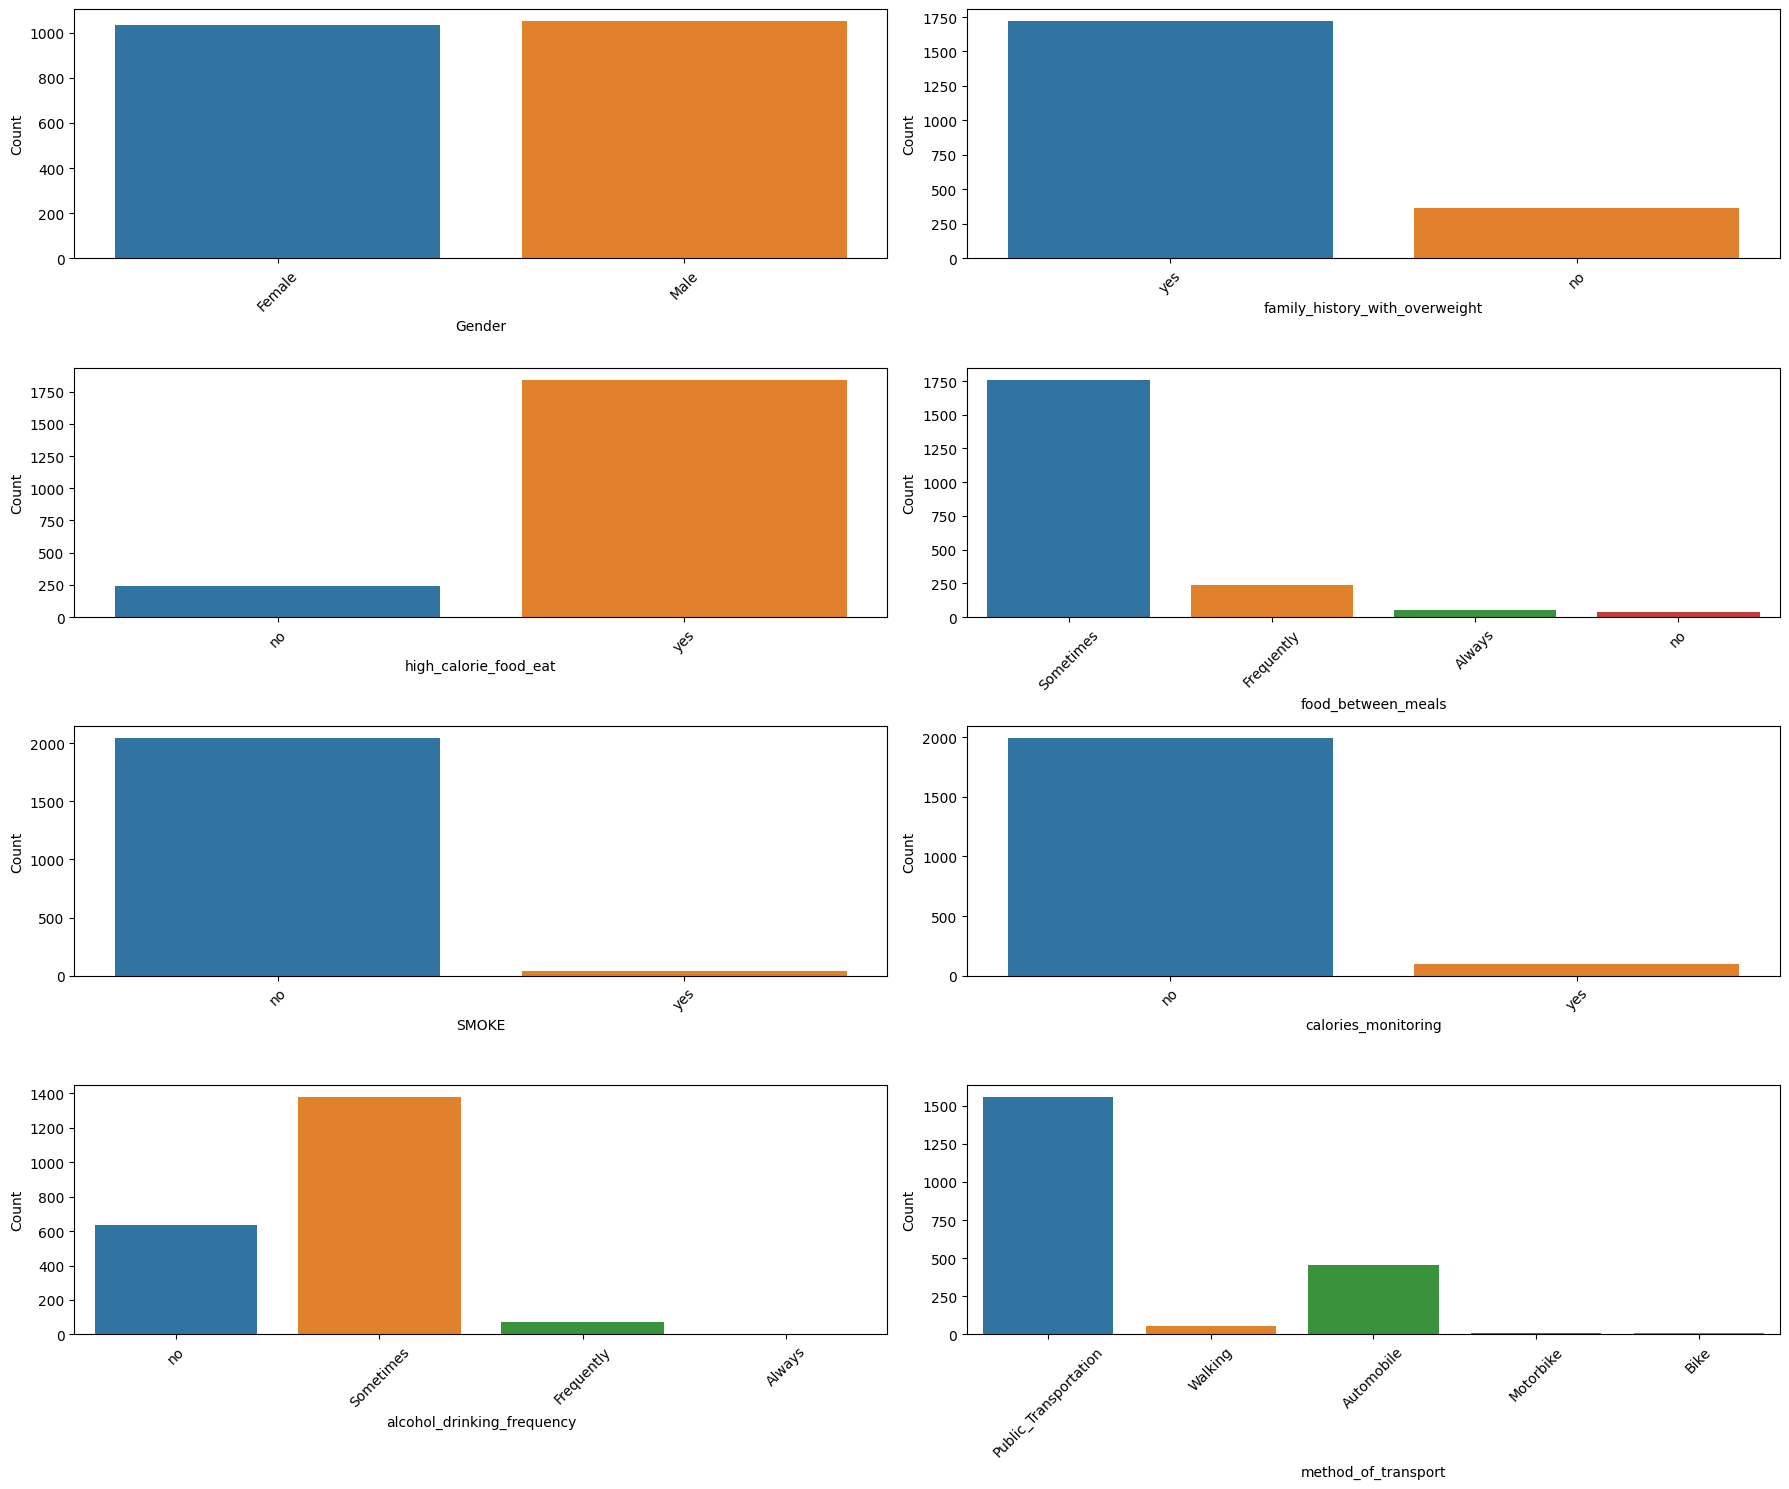

In [440]:
# Set the size of the figure
plt.figure(figsize=(18, 15))

# Loop through categorical columns (excluding the last one)
for i, col in enumerate(obesity.select_dtypes(include="object").columns[:-1]):
    plt.subplot(4, 2, i + 1)  # Create a subplot
    sns.countplot(data=obesity, x=col, hue=col, legend=False)  # Set hue to the same column    plt.title(f'Count of {col}')  # Add title for each subplot
    plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Gender: Data shows equal distribution of male vs female
Alcohol Drinking frequency: Higher number of people drinking sometimes
Calorie counting: Mostly no
Smoke: Mostly non smokers
food between meals: many in sometimes category
high calorie food eat: a high frequency of yes
family history with overweight: high frequency of yes
Method of transportation: Very high use of public transportation


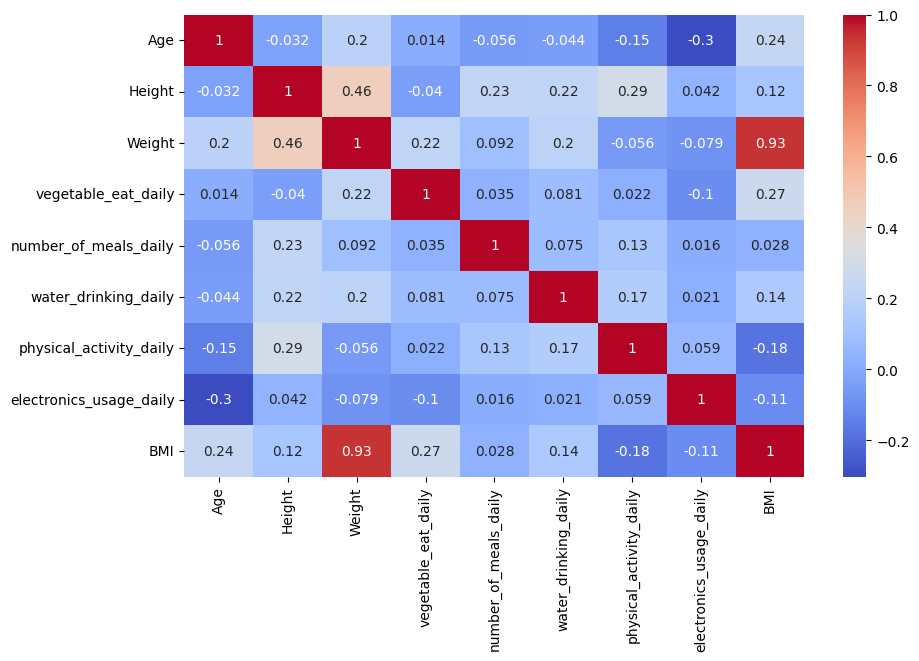

In [441]:
# explore any relationships between numeric types
# Select only the numeric columns from the dataset
numeric_data = obesity.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


Most corelation coffecients are small - indicating most variables are indepenant. This is important because it indicates no Multicollinearity. Possible makes it easier to identify effect on target variable Obesity Levels. 


#### Understanding distributions and outliers for numerical features

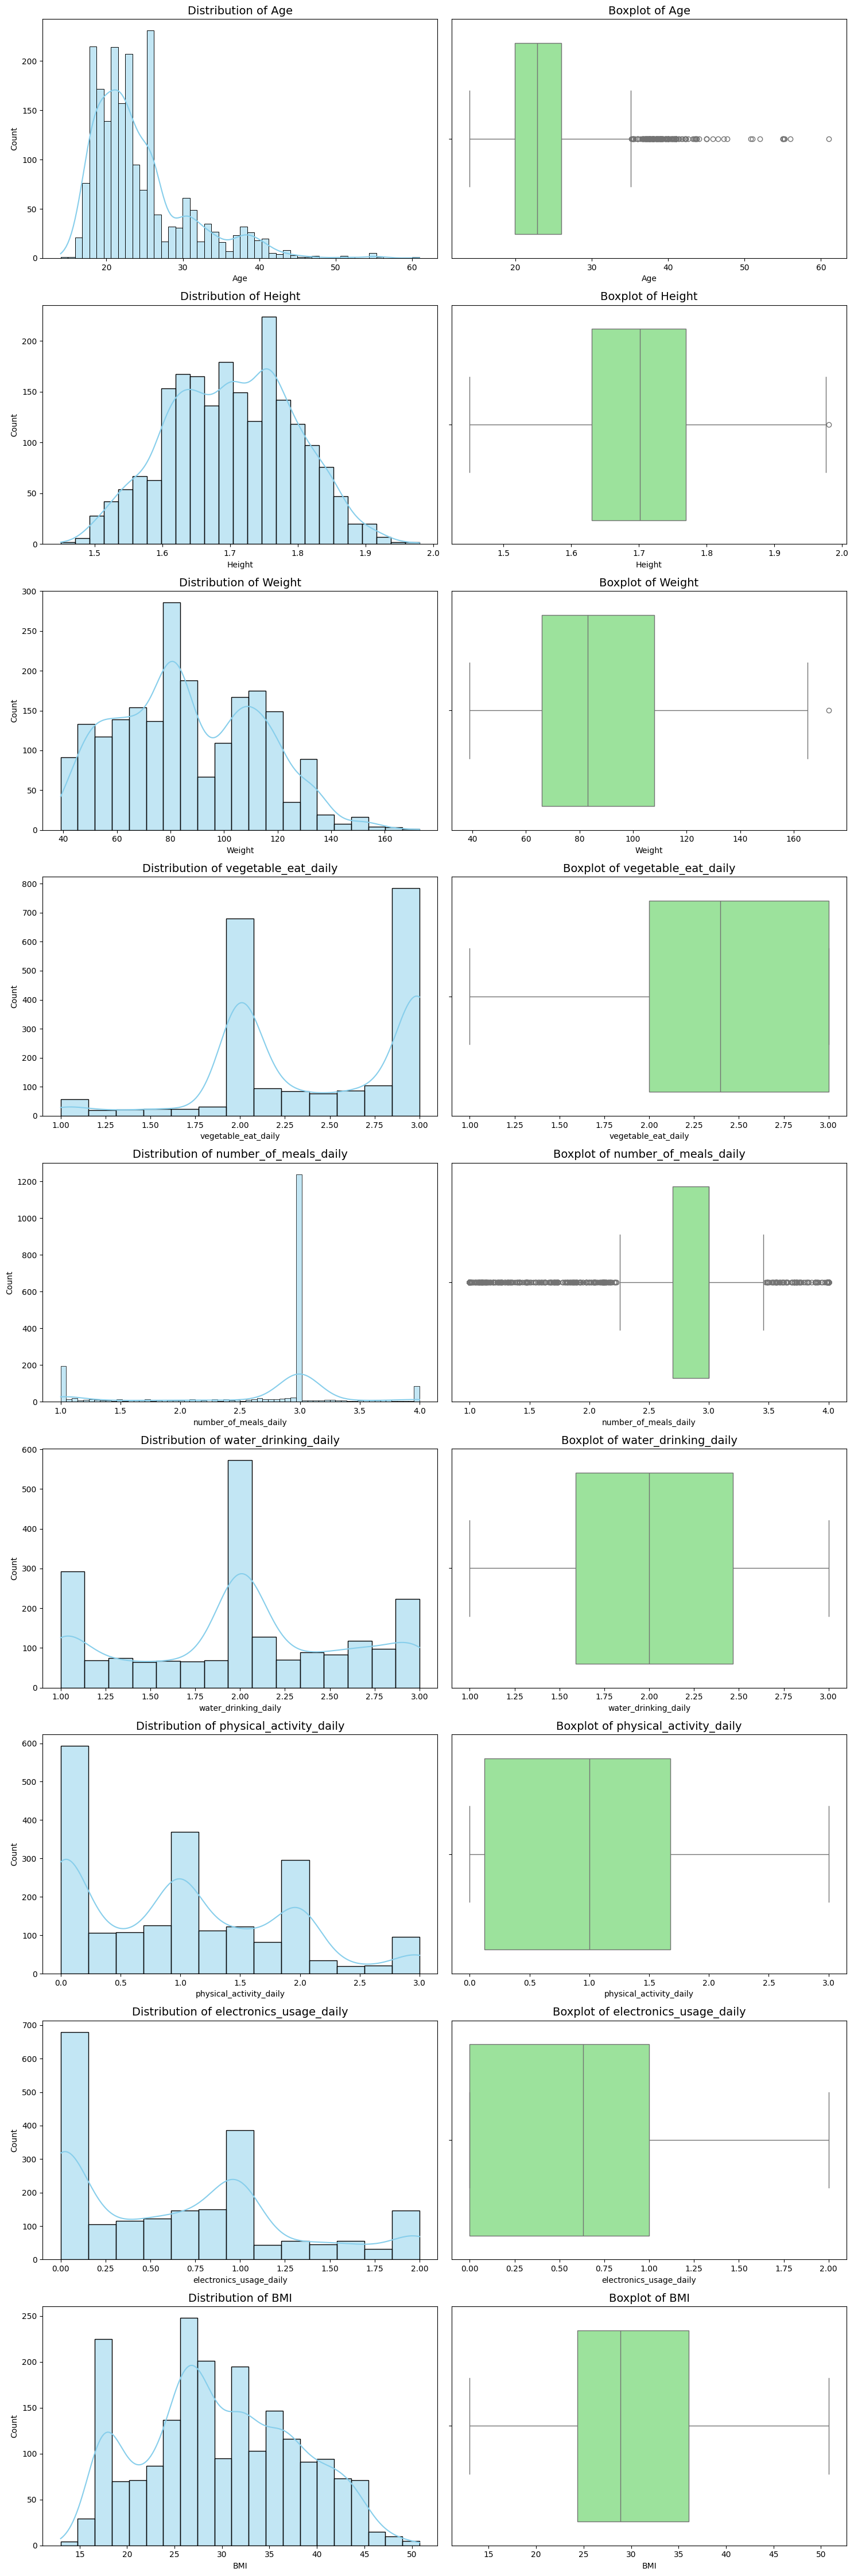

In [442]:
# Select only numerical columns from the DataFrame
numerical_cols = obesity.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure size based on the number of numerical variables
plt.figure(figsize=(15, len(numerical_cols) * 5))

# Loop through each numerical column
for i, col in enumerate(numerical_cols):
    # Distribution plot (Histogram + KDE)
    plt.subplot(len(numerical_cols), 2, 2 * i + 1)
    sns.histplot(obesity[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    
    # Boxplot
    plt.subplot(len(numerical_cols), 2, 2 * i + 2)
    sns.boxplot(x=obesity[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

Age has many outliers. It may be worth to cap it down to 99th percentile. 

16.595756740000002
43.59380528


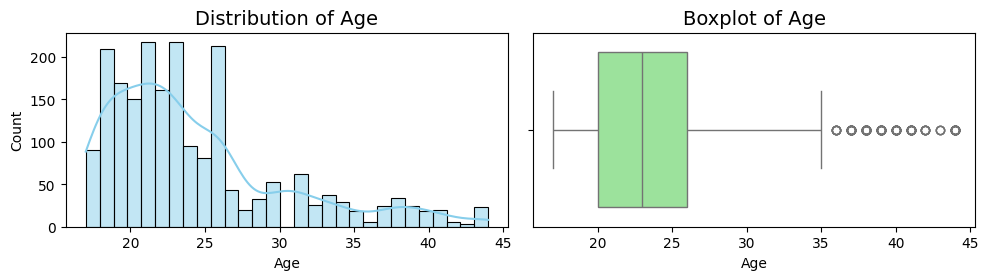

In [443]:
# Cap the Age variable to its 1st and 99th percentiles
lower_bound = obesity['Age'].quantile(0.01)
upper_bound = obesity['Age'].quantile(0.99)
print(lower_bound)
print(upper_bound)
# Apply the caps
obesity['Age'] = obesity['Age'].clip(lower=lower_bound, upper=upper_bound)
col = 'Age'
obesity[col] = obesity[col].round() 
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.histplot(obesity[col], kde=True, color='skyblue')
plt.title(f'Distribution of {col}', fontsize=14)
plt.subplot(2, 2, 2)
sns.boxplot(x=obesity[col], color='lightgreen')
plt.title(f'Boxplot of {col}', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

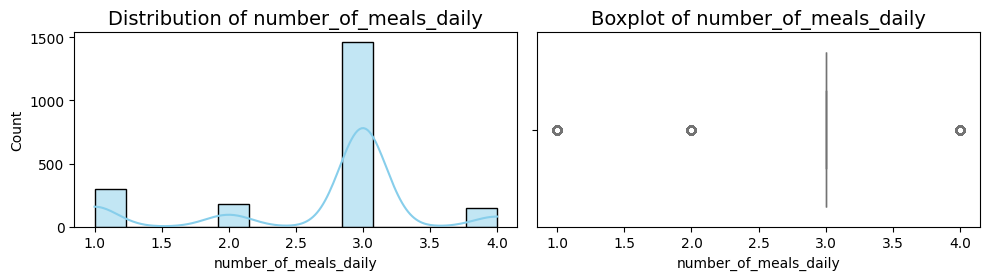

In [444]:
# number of meals has many fractional values, rounding to near 0.5 unit 
col = 'number_of_meals_daily'
obesity[col] = obesity[col].round() 
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.histplot(obesity[col], kde=True, color='skyblue')
plt.title(f'Distribution of {col}', fontsize=14)
plt.subplot(2, 2, 2)
sns.boxplot(x=obesity[col], color='lightgreen')
plt.title(f'Boxplot of {col}', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

**Analysis of Distribution**
Vegetable: most people are eating between 2-3 vegetables daily
Number of Meals: most people eating around 3 meals daily
Water: Most people are drinking between 1.5 and 2.5 L water daily
Electronic Usage: Most people are saying they use between 0 - 1 hours of electronic
Physical activity: Most people are engaging in physical activity 0 - 1.5 days (assume weekly)


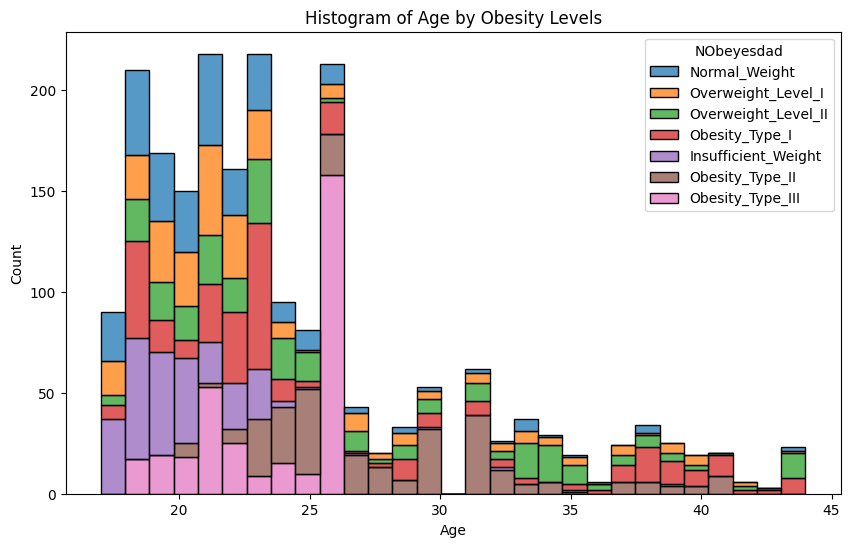

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=obesity, x='Age', hue='NObeyesdad', multiple='stack', kde=False)

# Add labels and title for histogram
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age by Obesity Levels')
plt.show()

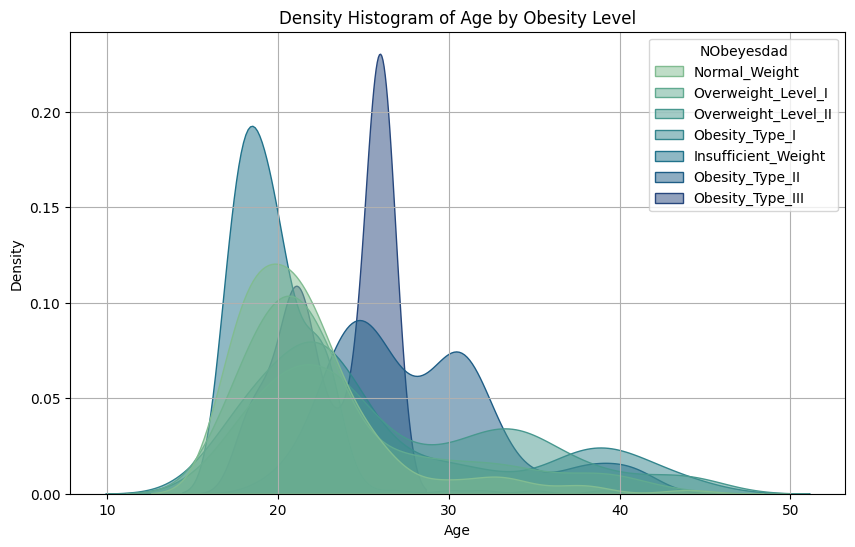

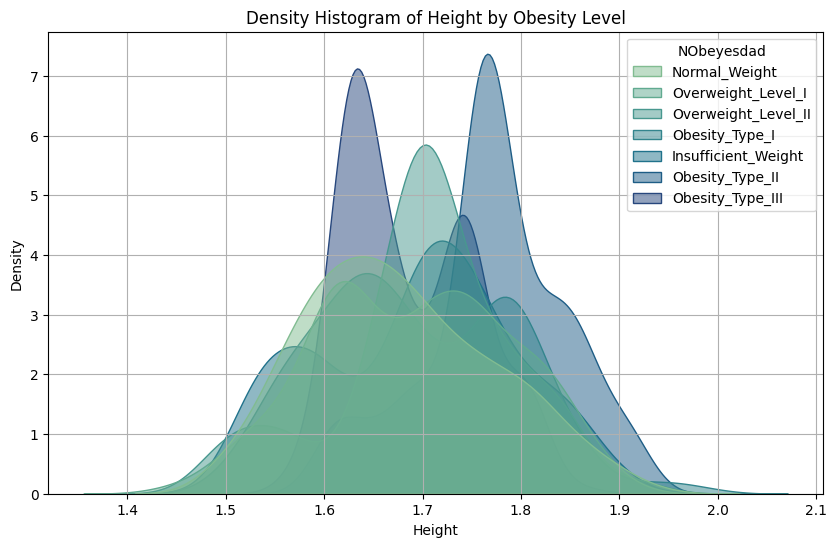

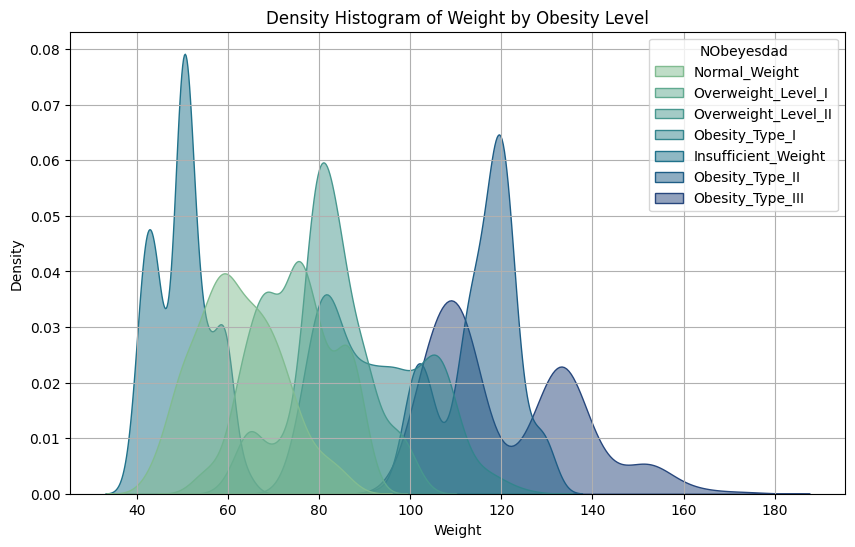

/var/folders/mv/1l8hsgqn1gg1ysw_5rvfsz7c0000gp/T/ipykernel_62891/988716294.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=obesity, x=var, hue='NObeyesdad', fill=True, common_norm=False, palette="crest", alpha=0.5)


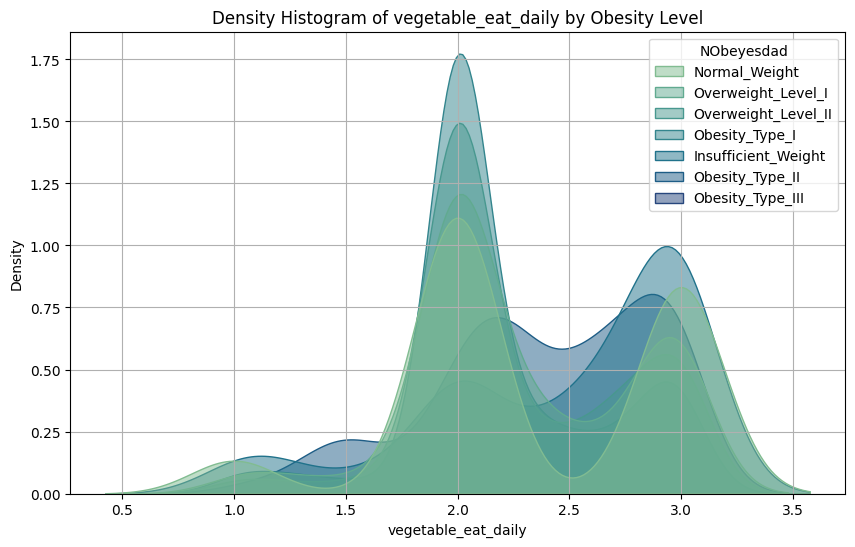

/var/folders/mv/1l8hsgqn1gg1ysw_5rvfsz7c0000gp/T/ipykernel_62891/988716294.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=obesity, x=var, hue='NObeyesdad', fill=True, common_norm=False, palette="crest", alpha=0.5)


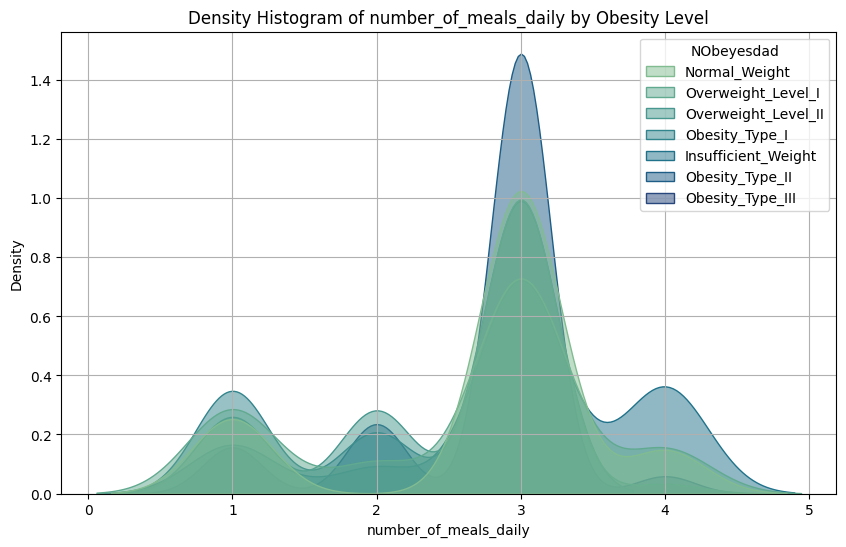

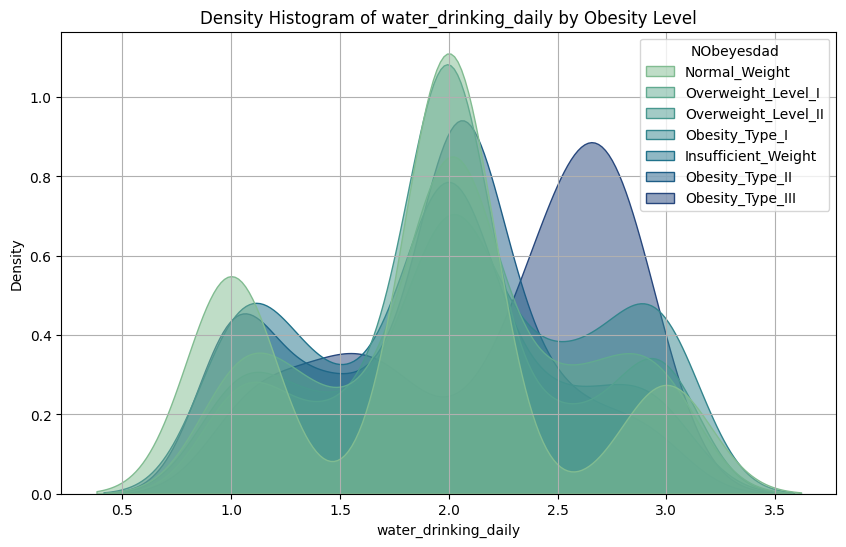

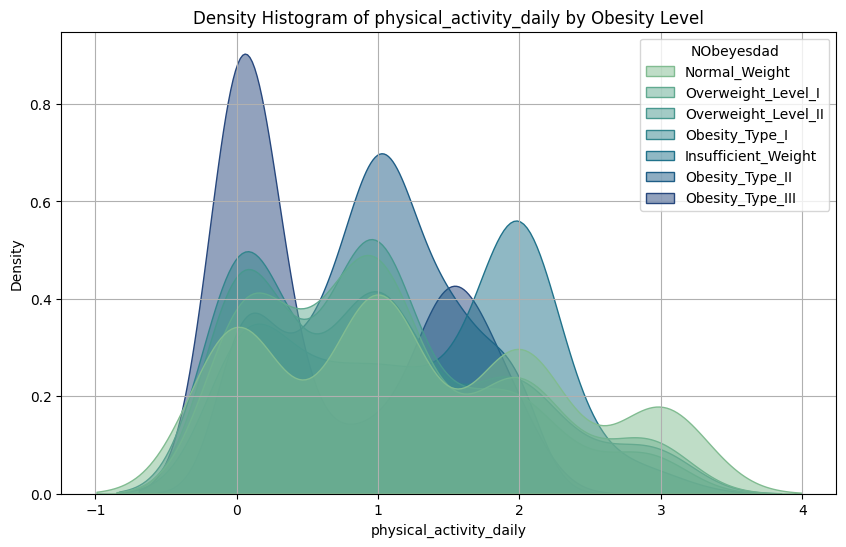

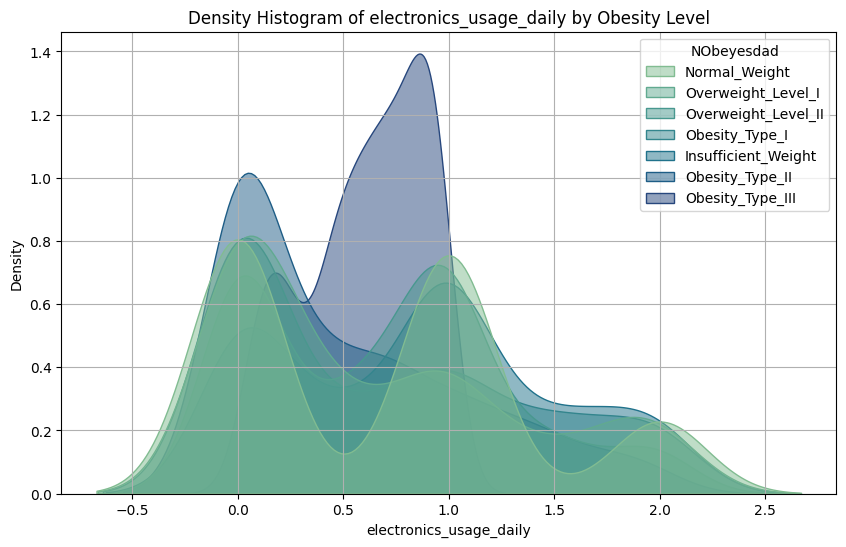

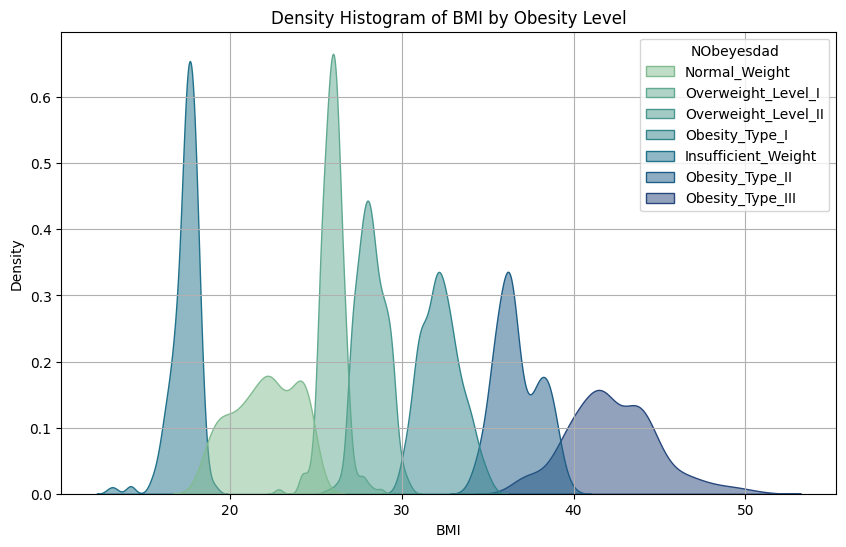

In [446]:
# Create density plots
# List of numerical variables to loop through
# Select only numerical columns from the DataFrame
numerical_cols = obesity.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical variable and create density plots
for var in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=obesity, x=var, hue='NObeyesdad', fill=True, common_norm=False, palette="crest", alpha=0.5)
    plt.title(f'Density Histogram of {var} by Obesity Level')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()



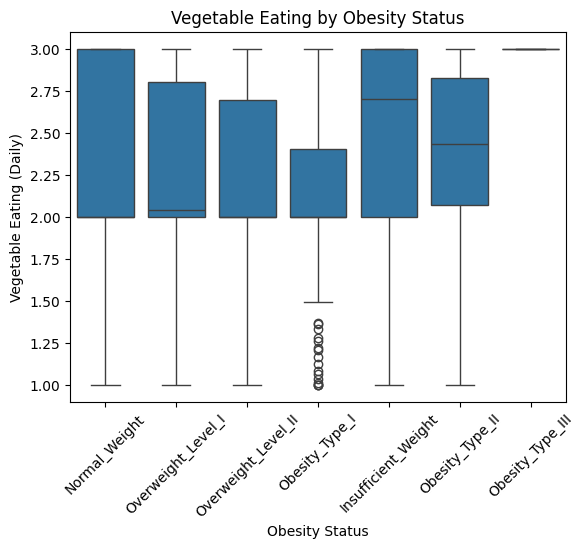

In [447]:
# Selecting numerical variables for pair plot
# Example: Box plot for vegetable eating by obesity status
plt.figure(figure=(15, 15))
sns.boxplot(x='NObeyesdad', y='vegetable_eat_daily', data=obesity)
plt.title('Vegetable Eating by Obesity Status')
plt.xlabel('Obesity Status')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.ylabel('Vegetable Eating (Daily)')
plt.show()

### Understanding relationship between family history and obesity level

In [448]:
import pandas as pd
from scipy.stats import chi2_contingency



# Set pandas display options for wider output
pd.set_option('display.width', 1000)  # Adjust as needed
pd.set_option('display.max_columns', None)  # Show all columns

# Combine obesity categories into 'Combined_Obesity'
obesity['NObeyesdad_combined'] = obesity['NObeyesdad'].replace({
    'Obesity_Type_I': 'Combined_Obesity',
    'Obesity_Type_II': 'Combined_Obesity',
    'Obesity_Type_III': 'Combined_Obesity'
})

# Create a contingency table
contingency_table = pd.crosstab(obesity['family_history_with_overweight'], obesity['NObeyesdad_combined'])
print(contingency_table)


# Perform Chi-Squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}, p-value: {p.round(11)}")


NObeyesdad_combined             Combined_Obesity  Insufficient_Weight  Normal_Weight  Overweight_Level_I  Overweight_Level_II
family_history_with_overweight                                                                                               
no                                             8                  142            130                  67                   18
yes                                          964                  125            152                 209                  272
Chi-squared statistic: 617.1765375524251, p-value: 0.0


The table and chi-square p-value ~ 0.0 indicate there is strong evidence to reject the null hypothesis, suggesting that there is a significant association between family_history_with_overweight and NObesity (obesity levels).

**Check assosiation between smoking and obesity**

In [449]:
# Create a contingency table
contingency_table_smoking = pd.crosstab(obesity['SMOKE'], obesity['NObeyesdad'])
print(contingency_table_smoking)
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_smoking)

# Display the results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between smoking status and obesity levels.")
else:
    print("Fail to reject the null hypothesis: No association between smoking status and obesity levels.")

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  Overweight_Level_II
SMOKE                                                                                                                                     
no                          266            269             345              282               323                 273                  285
yes                           1             13               6               15                 1                   3                    5
Chi-squared Statistic: 31.854719789168957
P-value: 1.7397906082796296e-05
Reject the null hypothesis: There is an association between smoking status and obesity levels.


** Checking association between calorie monitoring and obesity levels ** 

In [450]:
# Create a contingency table
contingency_table_calorie_counting = pd.crosstab(obesity['calories_monitoring'], obesity['NObeyesdad'])
print(contingency_table_calorie_counting)
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_calorie_counting)

# Display the results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between calorie counting and obesity levels.")
else:
    print("Fail to reject the null hypothesis: No association between calorie counting and obesity levels.")

NObeyesdad           Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  Overweight_Level_II
calories_monitoring                                                                                                                                
no                                   245            252             349              296               324                 239                  286
yes                                   22             30               2                1                 0                  37                    4
Chi-squared Statistic: 128.0308815120972
P-value: 3.338513065194255e-25
Reject the null hypothesis: There is an association between calorie counting and obesity levels.


**Check transportation and obesity association**

In [451]:
# Create a contingency table
contingency_table_transport = pd.crosstab(obesity['method_of_transport'], obesity['NObeyesdad_combined'])
print(contingency_table_transport)
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_transport)

# Display the results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between transport and obesity levels.")
else:
    print("Fail to reject the null hypothesis: No association between transport and obesity levels.")

NObeyesdad_combined    Combined_Obesity  Insufficient_Weight  Normal_Weight  Overweight_Level_I  Overweight_Level_II
method_of_transport                                                                                                 
Automobile                          206                   46             44                  66                   94
Bike                                  1                    0              4                   2                    0
Motorbike                             3                    0              6                   1                    1
Public_Transportation               759                  215            197                 198                  189
Walking                               3                    6             31                   9                    6
Chi-squared Statistic: 157.11681769383597
P-value: 3.0647201272259555e-25
Reject the null hypothesis: There is an association between transport and obesity levels.


Interesting here, the dataset doesnot contain enough instances of other forms of transport besides Auto and public transportation. 

In [452]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_calorie_food_eat,vegetable_eat_daily,number_of_meals_daily,food_between_meals,SMOKE,water_drinking_daily,calories_monitoring,physical_activity_daily,electronics_usage_daily,alcohol_drinking_frequency,method_of_transport,NObeyesdad,BMI,NObeyesdad_combined
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight_Level_II


In [472]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# obesity = obesity.rename(columns={"CALC":"alcohol_drinking_frequency",
#             "FAVC":"high_calorie_food_eat",
#             "FCVC":"vegetable_eat_daily",
#             "NCP":"number_of_meals_daily",
#             "SCC":"calories_monitoring",
#             "CH2O":"water_drinking_daily",
#             "FAF":"physical_activity_daily",
#             "TUE":"electronics_usage_daily",
#             "CAEC":"food_between_meals",
#             "MTRANS":"method_of_transport"})


# Obesity_mapping
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Overweight_Level_III': 4, 
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}

# Binary classification for obesity
# Example: Group all obesity types together as "Obese" and others as "Not Obese"
obesity['Obese'] = obesity['NObeyesdad'].apply(lambda x: 1 if x in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'] else 0)
obesity['NObeyesdad_encoded'] =  obesity['NObeyesdad'].map(obesity_mapping)
# Initialize the encoder
le = LabelEncoder()
# Encode categorical variables
obesity['family_history_with_overweight'] = le.fit_transform(obesity['family_history_with_overweight'])
family_history_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Family History Encoding:", family_history_mapping)
obesity['SMOKE'] = le.fit_transform(obesity['SMOKE'])
obesity['method_of_transport'] = le.fit_transform(obesity['method_of_transport'])
obesity['Gender'] = le.fit_transform(obesity['Gender'])

# Display the mapping of labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

alcohol_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Apply the mapping to the 'alcohol_drinking_frequency' column
obesity['alcohol_drinking_frequency_encoded'] = obesity['alcohol_drinking_frequency'].map(alcohol_mapping)
# Create a logistic regression model betwen lifestyle factors and obesity
# Define the independent variables for lifestyle factors
X_lifestyle = obesity[['physical_activity_daily', 'electronics_usage_daily', 'SMOKE', 'alcohol_drinking_frequency_encoded', 'method_of_transport']]
y = obesity['Obese']


# Add constant term for intercept
X_lifestyle = sm.add_constant(X_lifestyle)

# Fit the logistic regression model
model_lifestyle = sm.Logit(y, X_lifestyle).fit()

# Summary of the model
print(model_lifestyle.summary())


Family History Encoding: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
{np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Optimization terminated successfully.
         Current function value: 0.673495
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Obese   No. Observations:                 2087
Model:                          Logit   Df Residuals:                     2081
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.02505
Time:                        17:07:04   Log-Likelihood:                -1405.6
converged:                       True   LL-Null:                       -1441.7
Covariance Type:            nonrobust   LLR p-value:                 3.533e-14
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------



Model only explains only 2.5% of the variance, so a large variance is not explained by lifestyle factors. 

Check for Overfitting: Ensure that the model is not overfitting by using cross-validation techniques.
Non-linear Relationships: Explore non-linear transformations of the independent variables if there are indications of non-linear relationships between predictors and the outcome.


In [463]:
# Define the independent variable for heredity (family history)
X_heredity = obesity[['family_history_with_overweight']]
X_heredity = sm.add_constant(X_heredity)

# Fit the logistic regression model
model_heredity = sm.Logit(y, X_heredity).fit()

# Summary of the model
print(model_heredity.summary())

Optimization terminated successfully.
         Current function value: 0.584439
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Obese   No. Observations:                 2087
Model:                          Logit   Df Residuals:                     2085
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.1540
Time:                        16:52:27   Log-Likelihood:                -1219.7
converged:                       True   LL-Null:                       -1441.7
Covariance Type:            nonrobust   LLR p-value:                 1.500e-98
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.7983      0.357    -10.625     

Interestingly family history explains 15% of the variance compared to lifestyle model. 

In [464]:
# Define the independent variables for diet factors

# Define the correct mapping for 'alcohol_drinking_frequency'
high_calorie_food_eat_mapping = {
    'no': 0,
    'yes': 1,
}

# Apply the high_calorie_food_eat_mapping
obesity['high_calorie_food_eat_encoded'] = obesity['high_calorie_food_eat'].map(high_calorie_food_eat_mapping)


# 'high_calorie_food_eat',
X_diet = obesity[[ 'vegetable_eat_daily', 'number_of_meals_daily', 'water_drinking_daily']]
X_diet = sm.add_constant(X_diet)

# Fit the logistic regression model
model_diet = sm.Logit(y, X_diet).fit()

# Summary of the model
print(model_diet.summary())

Optimization terminated successfully.
         Current function value: 0.671481
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Obese   No. Observations:                 2087
Model:                          Logit   Df Residuals:                     2083
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.02796
Time:                        16:52:30   Log-Likelihood:                -1401.4
converged:                       True   LL-Null:                       -1441.7
Covariance Type:            nonrobust   LLR p-value:                 2.249e-17
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2996      0.288     -7.995      0.000      -2.863      -1.

model explains 2.7% of variability

In [473]:
#full model with all factors
# 'high_calorie_food_eat',
X_all = obesity[['vegetable_eat_daily', 'number_of_meals_daily', 'water_drinking_daily', 'family_history_with_overweight', 'physical_activity_daily', 'electronics_usage_daily', 'SMOKE', 'alcohol_drinking_frequency_encoded', 'method_of_transport', 'Age', 'Gender']]
X_all = sm.add_constant(X_all)


X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.25, random_state=42)

# Add the intercept (constant term) to the training and testing sets
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


# Fit the logistic regression model on the training data
model_all = sm.Logit(y_train, X_train).fit()

print(model_all.summary())

# Make predictions on the test data
y_pred = model_all.predict(X_test)

# Evaluate model performance (for binary classification, threshold can be applied)
from sklearn.metrics import accuracy_score

# Convert probabilities to binary predictions (for binary classification)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test set accuracy: {accuracy}")

# Fit the logistic regression model
model_all = sm.Logit(y, X_all).fit()





Optimization terminated successfully.
         Current function value: 0.538233
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Obese   No. Observations:                 1565
Model:                          Logit   Df Residuals:                     1553
Method:                           MLE   Df Model:                           11
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.2208
Time:                        17:07:09   Log-Likelihood:                -842.33
converged:                       True   LL-Null:                       -1081.0
Covariance Type:            nonrobust   LLR p-value:                 2.231e-95
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -9.1296      0.804    

In [474]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np

X_all_ordinal = obesity[['vegetable_eat_daily', 'number_of_meals_daily', 'water_drinking_daily', 'family_history_with_overweight', 'physical_activity_daily', 'electronics_usage_daily', 'SMOKE', 'alcohol_drinking_frequency_encoded', 'method_of_transport', 'Age', 'Gender']]

# Split the dataset into training and testing sets
X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_all_ordinal, obesity['NObeyesdad_encoded'], test_size=0.25, random_state=42)

# Fit the ordinal logistic regression model
model_all = OrderedModel(y_train_ord, X_train_ord, distr='logit')  # Use 'logit' for ordinal logistic regression
result_all = model_all.fit(maxiter=10000)  # Increase maxiter to 1000


# Print the summary of the results
print(result_all.summary())

# Make predictions on the test set
predicted_probs = result_all.predict(X_test_ord)

# Since it's an ordinal model, we want to get the predicted class
# To get the predicted classes, we can find the index where the cumulative probability exceeds 0.5
# We need to calculate the cumulative probabilities
cumulative_probs = np.cumsum(predicted_probs, axis=1)

# Assign classes based on cumulative probabilities
predicted_classes = (cumulative_probs.values > 0.5).argmax(axis=1)


# Map predicted classes to human-readable labels using a dictionary
label_mapping = {0: "Insufficient/Normal Weight", 
                 1: "Overweight", 
                 2: "Obesity"}

# Use np.vectorize to apply the mapping
predicted_labels = np.vectorize(label_mapping.get)(predicted_classes)

from sklearn.metrics import confusion_matrix, classification_report

# Compare predicted labels with actual labels
print(confusion_matrix(y_test_ord, predicted_classes))
print(classification_report(y_test_ord, predicted_classes))

Optimization terminated successfully.
         Current function value: 1.820654
         Iterations: 6495
         Function evaluations: 8422
                             OrderedModel Results                             
Dep. Variable:     NObeyesdad_encoded   Log-Likelihood:                -2849.3
Model:                   OrderedModel   AIC:                             5733.
Method:            Maximum Likelihood   BIC:                             5824.
Date:                Fri, 18 Oct 2024                                         
Time:                        17:07:24                                         
No. Observations:                1565                                         
Df Residuals:                    1548                                         
Df Model:                          11                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

/Users/bosky/boskymsaiicoursework/src/aai-500-project-obesity-levels/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bosky/boskymsaiicoursework/src/aai-500-project-obesity-levels/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bosky/boskymsaiicoursework/src/aai-500-project-obesity-levels/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sam

Key Coefficients:
- vegetable_eat_daily (-0.6900): A negative coefficient implies that eating vegetables daily is associated with lower odds of being in a higher obesity category. This effect is highly significant (p < 0.001).
water_drinking_daily (0.3640): Drinking more water daily is associated with higher odds of being in a higher obesity category (p < 0.001).
- family_history_with_overweight (1.9328): This variable has a very strong and positive effect on the likelihood of being in a higher obesity category, and it’s highly significant (p < 0.001).
- electronics_usage_daily (-0.2672): Higher daily electronics usage is associated with lower odds of being in a higher obesity category (p = 0.002).
- SMOKE (-0.8841): Smoking is associated with lower odds of being in a higher obesity category, and this effect is significant (p = 0.020).
- Age (0.1061): Age has a positive association with obesity levels, meaning older individuals are more likely to be in higher obesity categories. This is highly significant (p < 0.001).
method_of_transport (0.1862): This variable has a significant positive effect on obesity levels (p < 0.001), though the interpretation depends on how this variable was encoded.
- Variables like physical_activity_daily and alcohol_drinking_frequency_encoded show non-significant effects, indicating these factors may not be strong predictors of obesity levels in this model.

Classification Metrics:

Precision: Indicates how often the model's positive predictions are correct for each class.
Class 0 (Insufficient/Normal Weight): 0.79
Class 1 (Overweight): 0.24
Class 2 (Obesity): 0.65

Recall: Measures how well the model identifies all instances of a class.
Class 0: 0.43
Class 1: 0.41
Class 2: 0.59

F1-Score: The harmonic mean of precision and recall, indicating model balance.
Class 0: 0.56
Class 1: 0.30
Class 2: 0.62

Accuracy: Overall, the model achieves 50% accuracy, meaning half of the predictions match the actual categories.
Macro Avg and Weighted Avg: These averages account for the precision, recall, and F1-scores across all classes.

Takeaways:
The model seems to perform moderately well for "Obesity" but struggles with distinguishing "Overweight" from the other categories, particularly "Insufficient/Normal Weight."
Several predictors have significant effects on the likelihood of being in a higher obesity category, with strong contributions from family history, water drinking, age, and vegetable intake.

Looking for multicollinearity of vegetables

In [421]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant column for VIF calculation
X = add_constant(obesity[['vegetable_eat_daily', 'number_of_meals_daily', 'water_drinking_daily', 
                     'family_history_with_overweight', 'physical_activity_daily']])

# Calculate VIF
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                         variable        VIF
0                           const  41.784548
1             vegetable_eat_daily   1.007949
2           number_of_meals_daily   1.021039
3            water_drinking_daily   1.072000
4  family_history_with_overweight   1.039155
5         physical_activity_daily   1.051606


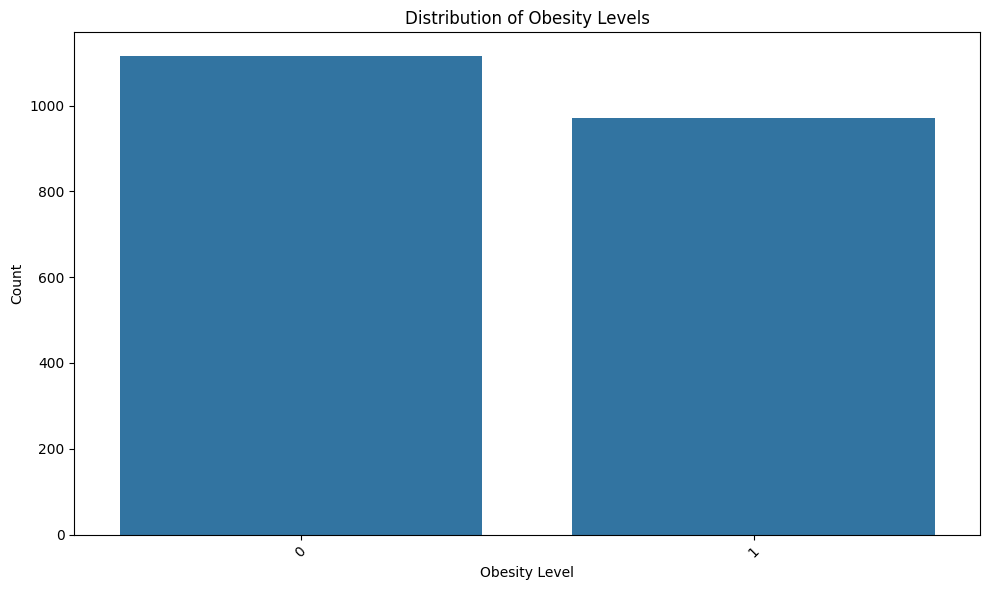

In [471]:
# Plot the distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Obese', data=obesity)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()